In [1]:
import openeo

#connect with VITO backend
connection = openeo.connect("https://openeo.vito.be")

In [2]:
connection.authenticate_basic("driesj","driesj123")

<Connection to 'https://openeo.vito.be/openeo/1.0/' with BearerAuth>

In [3]:
from rasterio.io import MemoryFile
def plot_result(data):
    with MemoryFile(geotiff_bytes) as memfile:
        with memfile.open() as dataset:
            data_array = dataset.read()
        from rasterio.plot import show,show_hist
        import matplotlib.pyplot as plt
        fig, (l, r) = plt.subplots(1, 2,figsize=(12, 5))
        
        show(data_array,cmap='YlGn',ax=l)
        show_hist(data_array,ax=r)

In [4]:
s2_fapar = connection.load_collection("TERRASCOPE_S2_FAPAR_V2",
            spatial_extent={'west':16.138916,'east':16.524124,'south':48.1386,'north':48.320647,'crs':'EPSG:4326'},
            temporal_extent=["2020-05-01","2020-05-20"] )

#specify process graph
fapar_composite = s2_fapar.max_time()
%time geotiff_bytes = fapar_composite.download(format="GTiff")

CPU times: user 81.3 ms, sys: 72.6 ms, total: 154 ms
Wall time: 28.8 s


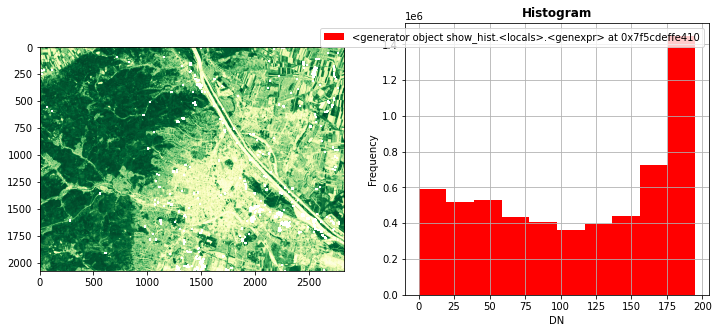

In [5]:
plot_result(geotiff_bytes)